# Preprocessing: Experimental Place Cells

This notebook provides context to explain:
- the raw data provided in matlab's files
- the preprocessing of the experimental place cells, for one experiment, here to chosen to be 34.

At the end of this notebook, we compute a table recording the number of cells _for each experiment_.

## Set up

In [1]:
import os
import subprocess

gitroot_path = subprocess.check_output(
    ["git", "rev-parse", "--show-toplevel"], universal_newlines=True
)

os.chdir(os.path.join(gitroot_path[:-1], "neuralgeom"))
print("Working directory: ", os.getcwd())

import warnings

warnings.filterwarnings("ignore")

import sys

sys_dir = os.path.dirname(os.getcwd())
sys.path.append(sys_dir)
print("Directory added to path: ", sys_dir)

Working directory:  /home/nmiolane/code/neuralgeom/neuralgeom
Directory added to path:  /home/nmiolane/code/neuralgeom


## Load raw data and find number of cells recorded

In [2]:
import glob

import numpy as np
import pandas as pd

import neuralgeom.datasets.utils as utils

RAW_DIR = os.path.join(os.getcwd(), "data", "raw")
print(f"The raw data is located in the directory:\n{RAW_DIR}.")

expt34 = utils.loadmat(os.path.join(RAW_DIR, "expt34.mat"))

INFO: Using pytorch backend


The raw data is located in the directory:
/home/nmiolane/code/neuralgeom/neuralgeom/data/raw.


In [3]:
expt34["x"]

{'rat': 637,
 'day': 6,
 'epoch': 'm1',
 'type': 'recalibration',
 'finalGain': 1,
 'rosdata': {'name': 'm1',
  'startTs': 361159799,
  'stopTs': 3324086342.0,
  'encTimes': array([3.61160505e+08, 3.61171038e+08, 3.61180586e+08, ...,
         3.32406152e+09, 3.32407161e+09, 3.32408187e+09]),
  'encAngle': array([ 4446.04852284,  4446.04852284,  4446.04852284, ...,
         22023.44647206, 22023.44647206, 22023.44647206]),
  'subepochs': {'name': 'm1a', 'startTs': 361159799, 'stopTs': 2200905388.0},
  'landAngle': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
  'gain': array([1, 1, 1, ..., 1, 1, 1], dtype=uint8),
  'vel': array([-0.64775596, -0.75541741, -0.84847871, ...,  0.03892294,
          0.02972   ,  0.01985613]),
  'relAngle': array([ 4446.04852284,  4446.04852284,  4446.04852284, ...,
         22023.44647206, 22023.44647206, 22023.44647206]),
  'landOffTime': 2200905385.5,
  'landOffAngle': 15246.583190808291,
  'landOffIdx': 183980,
  'estGain': array([1., 1., 1., ..., 1., 1., 

In [4]:
metadata = list(expt34["x"].keys())
print(f"You can find metadata about:\n {metadata}.")

You can find metadata about:
 ['rat', 'day', 'epoch', 'type', 'finalGain', 'rosdata', 'clust', 'specGain'].


In [5]:
n_cells = len(expt34["x"]["clust"])
print(f"There are {n_cells} cells/units/clusters recorded in this experiment.")

There are 40 cells/units/clusters recorded in this experiment.


## Extract angles information

In [6]:
rosdata = expt34["x"]["rosdata"]
enctimes = rosdata["encTimes"]

encangle = rosdata["encAngle"]
len(encangle) == len(enctimes)
print(len(encangle))

296299


In [7]:
diff_enctimes = enctimes[1:] - enctimes[:-1]

In [8]:
diff_enctimes

array([10533.25,  9547.75, 10203.  , ...,  9648.  , 10096.5 , 10260.5 ])

In [9]:
enctimes[0]

361160505.0

## Extract cell firing

We explore the firing of the cells. 

In [10]:
n_cells = len(expt34["x"]["clust"])
print(f"There are {n_cells} cells/units/clusters recorded in this experiment.")

There are 40 cells/units/clusters recorded in this experiment.


In [11]:
clust0 = expt34["x"]["clust"][0]
firing_times0 = clust0["ts"]
print(f"These are the times at which clust0 has fired:\n {firing_times0}.")

These are the times at which clust0 has fired:
 [3.68628787e+08 3.68635519e+08 3.68852857e+08 ... 3.07833970e+09
 3.07834393e+09 3.28162030e+09].


In [12]:
firing_times0[0]

368628787.0

In [13]:
len(firing_times0)

1319

In [14]:
times = []
for clust in expt34["x"]["clust"]:
    times.extend(clust["ts"])

times = sorted(times)
n_times = len(times)
print(f"Number of times before deleting duplicates: {n_times}.")
aux = []
for time in times:
    if time not in aux:
        aux.append(time)
n_times = len(aux)
print(f"Number of times after deleting duplicates: {n_times}.")
times = aux

Number of times before deleting duplicates: 41889.
Number of times after deleting duplicates: 41849.


Exploring histogram of time steps to choose a binsize.

In [15]:
times = np.array(times)
print(times.shape)
diff_times = times[1:] - times[:-1]

(41849,)


In [16]:
diff_times.shape

(41848,)

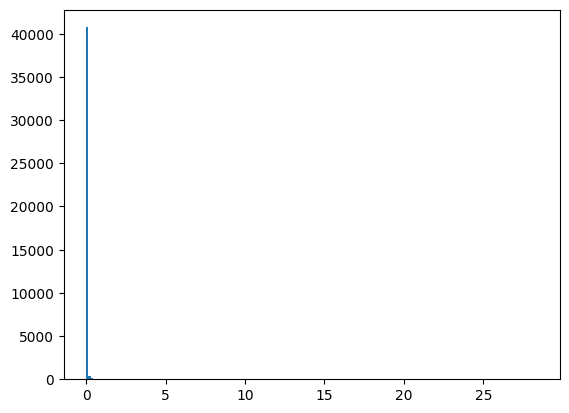

In [17]:
import matplotlib.pyplot as plt

plt.hist(diff_times * 1e-6, bins=200)
plt.show()

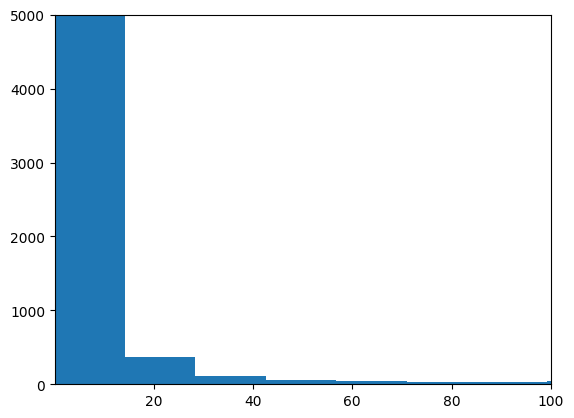

In [18]:
import matplotlib.pyplot as plt

plt.hist(diff_times * 1e-4, bins=200)
plt.xlim(0.1, 100)
plt.ylim(0, 5000)
plt.show()

In [19]:
delta_time = 1000000
regular_times = np.arange(start=times[0], stop=times[-1], step=delta_time)

In [20]:
diff_regular_times = regular_times[1:] - regular_times[:-1]
diff = regular_times[2] - regular_times[1]
assert sum(diff_regular_times != diff) == 0

In [21]:
print(len(times))
print(len(regular_times))

41849
2954


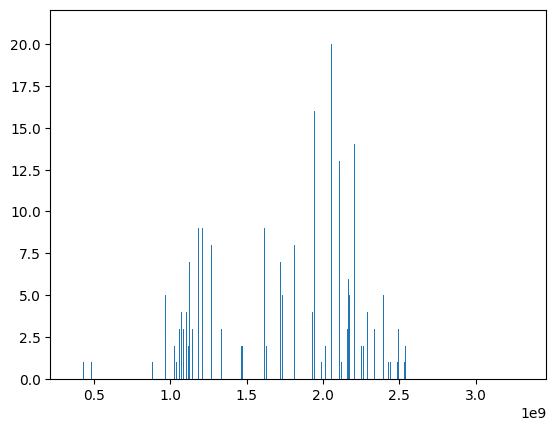

In [22]:
cell0 = expt34["x"]["clust"][0]
ts0 = cell0["ts"]

counts, bins, _ = plt.hist(ts0, bins=regular_times)

In [23]:
sum(bins != regular_times)

0

In [24]:
type(counts)
counts.shape

(2953,)

## Bin the cell firing

Processing cell 0...
Processing cell 1...
Processing cell 2...
Processing cell 3...
Processing cell 4...
Processing cell 5...
Processing cell 6...
Processing cell 7...
Processing cell 8...
Processing cell 9...
Processing cell 10...
Processing cell 11...
Processing cell 12...
Processing cell 13...
Processing cell 14...
Processing cell 15...
Processing cell 16...
Processing cell 17...
Processing cell 18...
Processing cell 19...
Processing cell 20...
Processing cell 21...
Processing cell 22...
Processing cell 23...
Processing cell 24...
Processing cell 25...
Processing cell 26...
Processing cell 27...
Processing cell 28...
Processing cell 29...
Processing cell 30...
Processing cell 31...
Processing cell 32...
Processing cell 33...
Processing cell 34...
Processing cell 35...
Processing cell 36...
Processing cell 37...
Processing cell 38...
Processing cell 39...


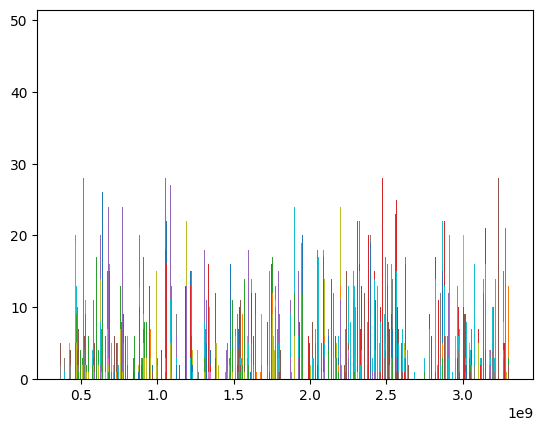

In [25]:
n_times = len(regular_times) - 1
place_cells = np.zeros((n_times, n_cells))

for i_cell, cell in enumerate(expt34["x"]["clust"]):
    print(f"Processing cell {i_cell}...")
    counts, bins, _ = plt.hist(cell["ts"], bins=regular_times)
    assert sum(bins != regular_times) == 0
    assert len(counts) == n_times
    place_cells[:, i_cell] = counts

The array `place_cells` is of shapes `n_time_steps x n_neurons`.

In [26]:
place_cells.shape

(2953, 40)

In [27]:
np.max(place_cells)

49.0

In [28]:
np.min(place_cells)

0.0

We plot the firing of the `n_neurons` place cells as a function of the time step, where time step is on the horizontal axis.

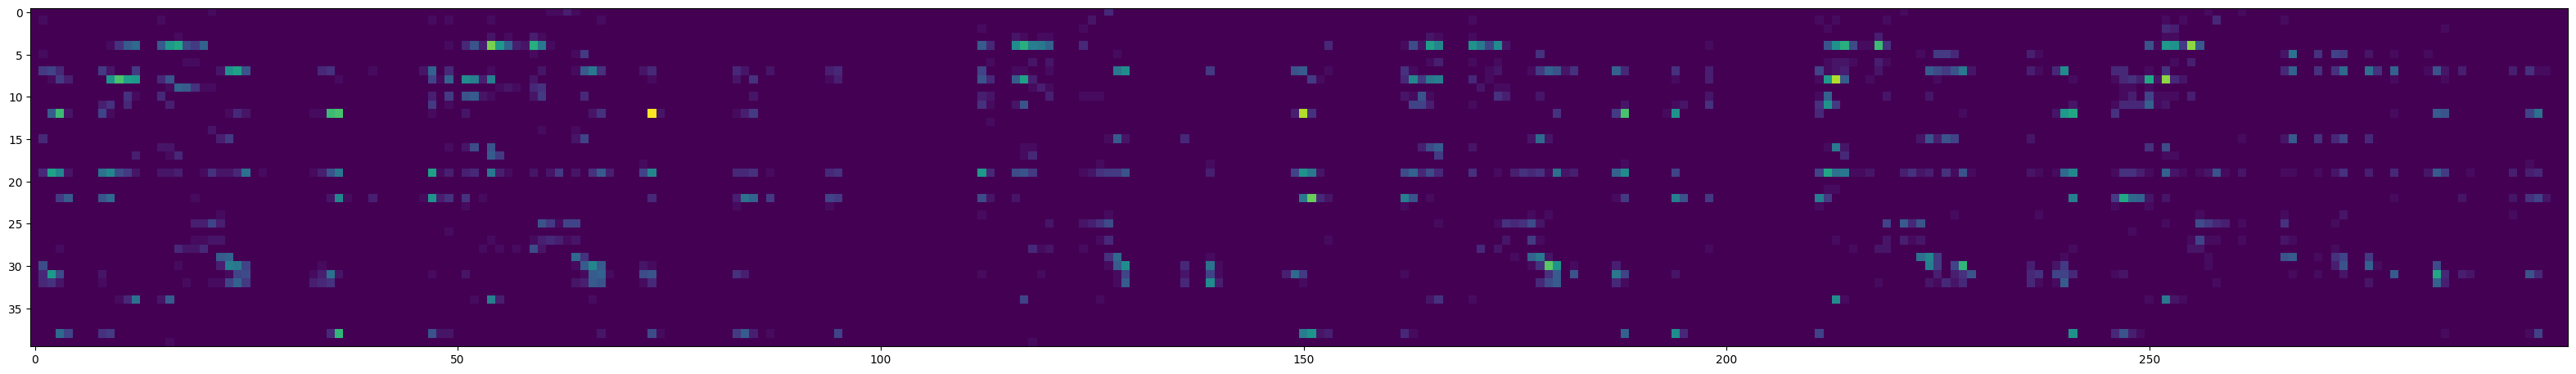

In [29]:
plt.figure(figsize=(40, 10))
plt.imshow(
    place_cells[
        100:400,
    ].T,
    cmap="viridis",
);

In [30]:
# np.save("place_cells_expt34_b.npy", place_cells)

## Bin the rat's position


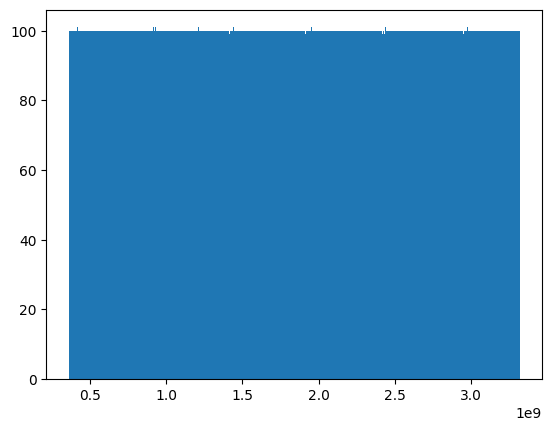

In [31]:
enc_counts, enc_bins, _ = plt.hist(enctimes, bins=regular_times)

In [32]:
np.mean(encangle[1 : 2 + 1])

4446.04852283954

In [33]:
averaged_encangles = []
cum_count = 0
for count in enc_counts:
    averaged_encangles.append(np.mean(encangle[cum_count : cum_count + int(count)]))
    cum_count += int(count)
assert len(averaged_encangles) == len(regular_times) - 1

We observe that we have absolute angles, i.e. angles > 360 degrees where the animal keeps turning.

In [34]:
averaged_encangles

[4445.815085339541,
 4449.515412487978,
 4474.552048230166,
 4504.048600964541,
 4532.071813855166,
 4554.352228894229,
 4557.608752331728,
 4566.483513073916,
 4593.869455456728,
 4604.249147839541,
 4605.541003308291,
 4605.737072644229,
 4607.5292552614155,
 4627.985724987979,
 4649.400646862979,
 4674.786818737978,
 4681.348864636416,
 4681.322663464541,
 4681.139147839541,
 4680.767370495791,
 4680.7729076051655,
 4680.777038464541,
 4680.777038464541,
 4680.777038464541,
 4680.777038464541,
 4680.777038464541,
 4680.800768933291,
 4680.777038464541,
 4680.777038464541,
 4680.777038464541,
 4680.777038464541,
 4680.777038464541,
 4687.4945872926655,
 4708.016442761416,
 4711.733810925479,
 4712.572912487978,
 4714.801130261416,
 4715.096594128603,
 4715.1248949098535,
 4715.171608777041,
 4715.208674255074,
 4715.280855936132,
 4715.395886120791,
 4715.449232539418,
 4715.430705456729,
 4715.450910978745,
 4715.456237683291,
 4715.456237683291,
 4715.456237683291,
 4715.4562376832

In [35]:
mod360_encangles = [a % 360 for a in averaged_encangles]

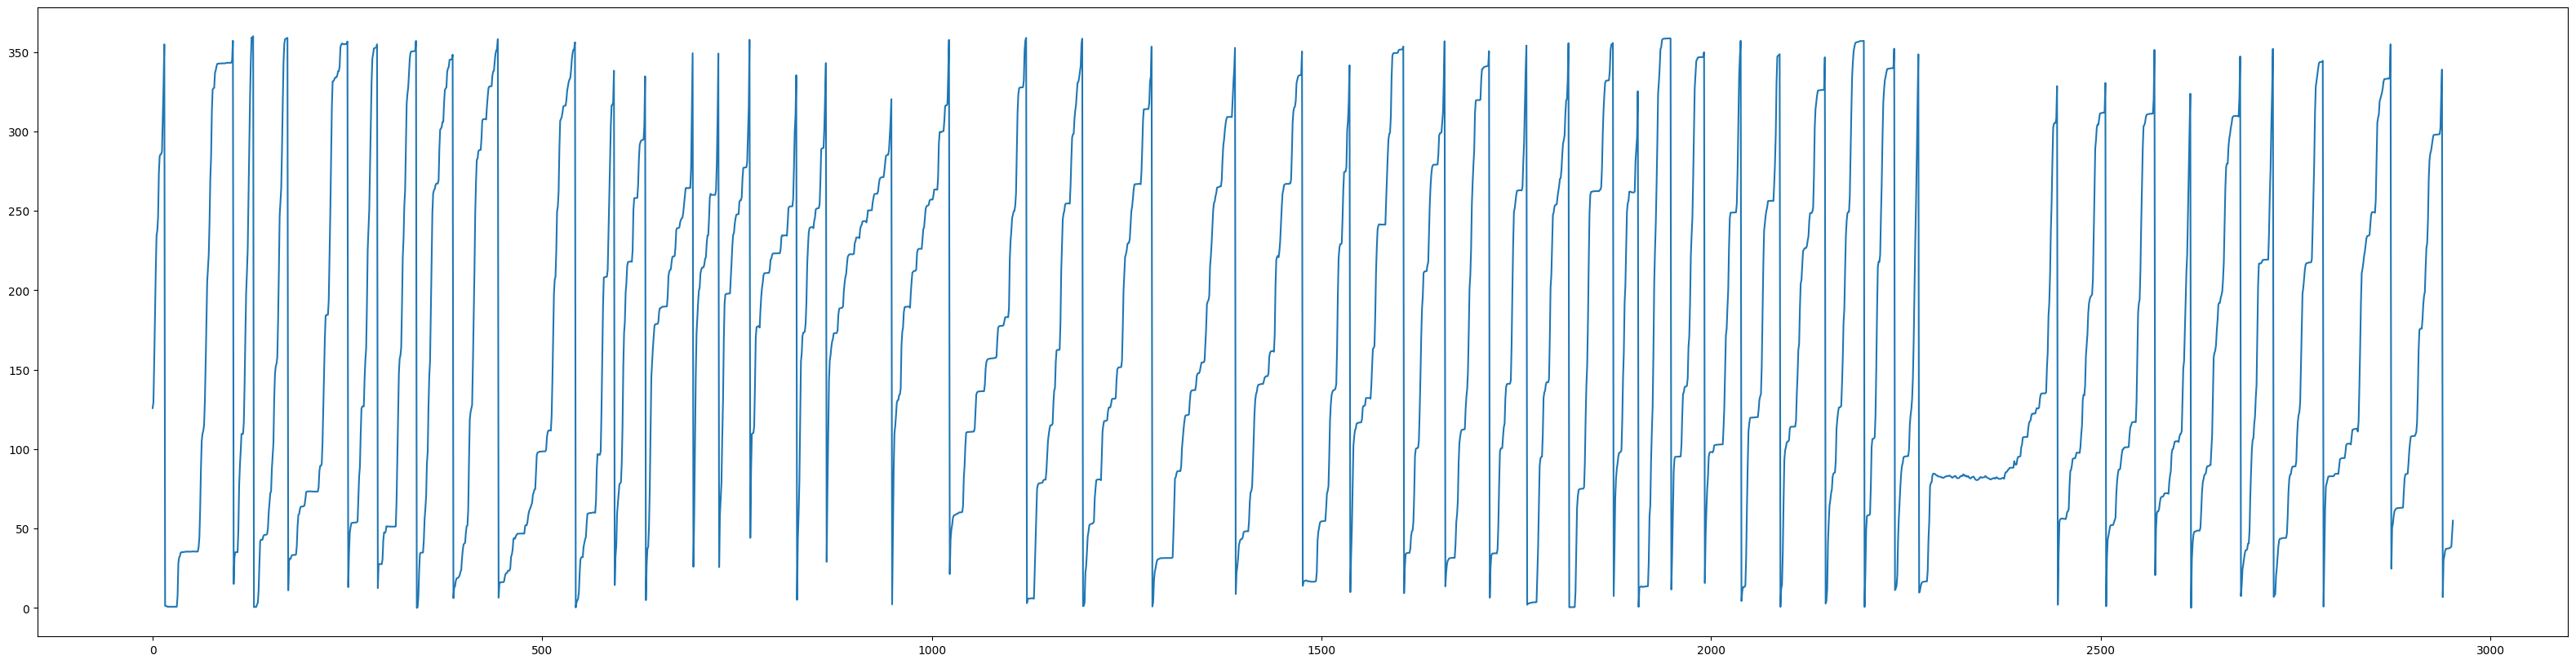

In [36]:
plt.subplots(figsize=(40, 10))
plt.plot(mod360_encangles);

In [37]:
# np.save("rat_angles_expt34_b.npy", mod360_encangles)

In [38]:
len(mod360_encangles) == len(place_cells)

True

## Plot cell firings and rat positions together

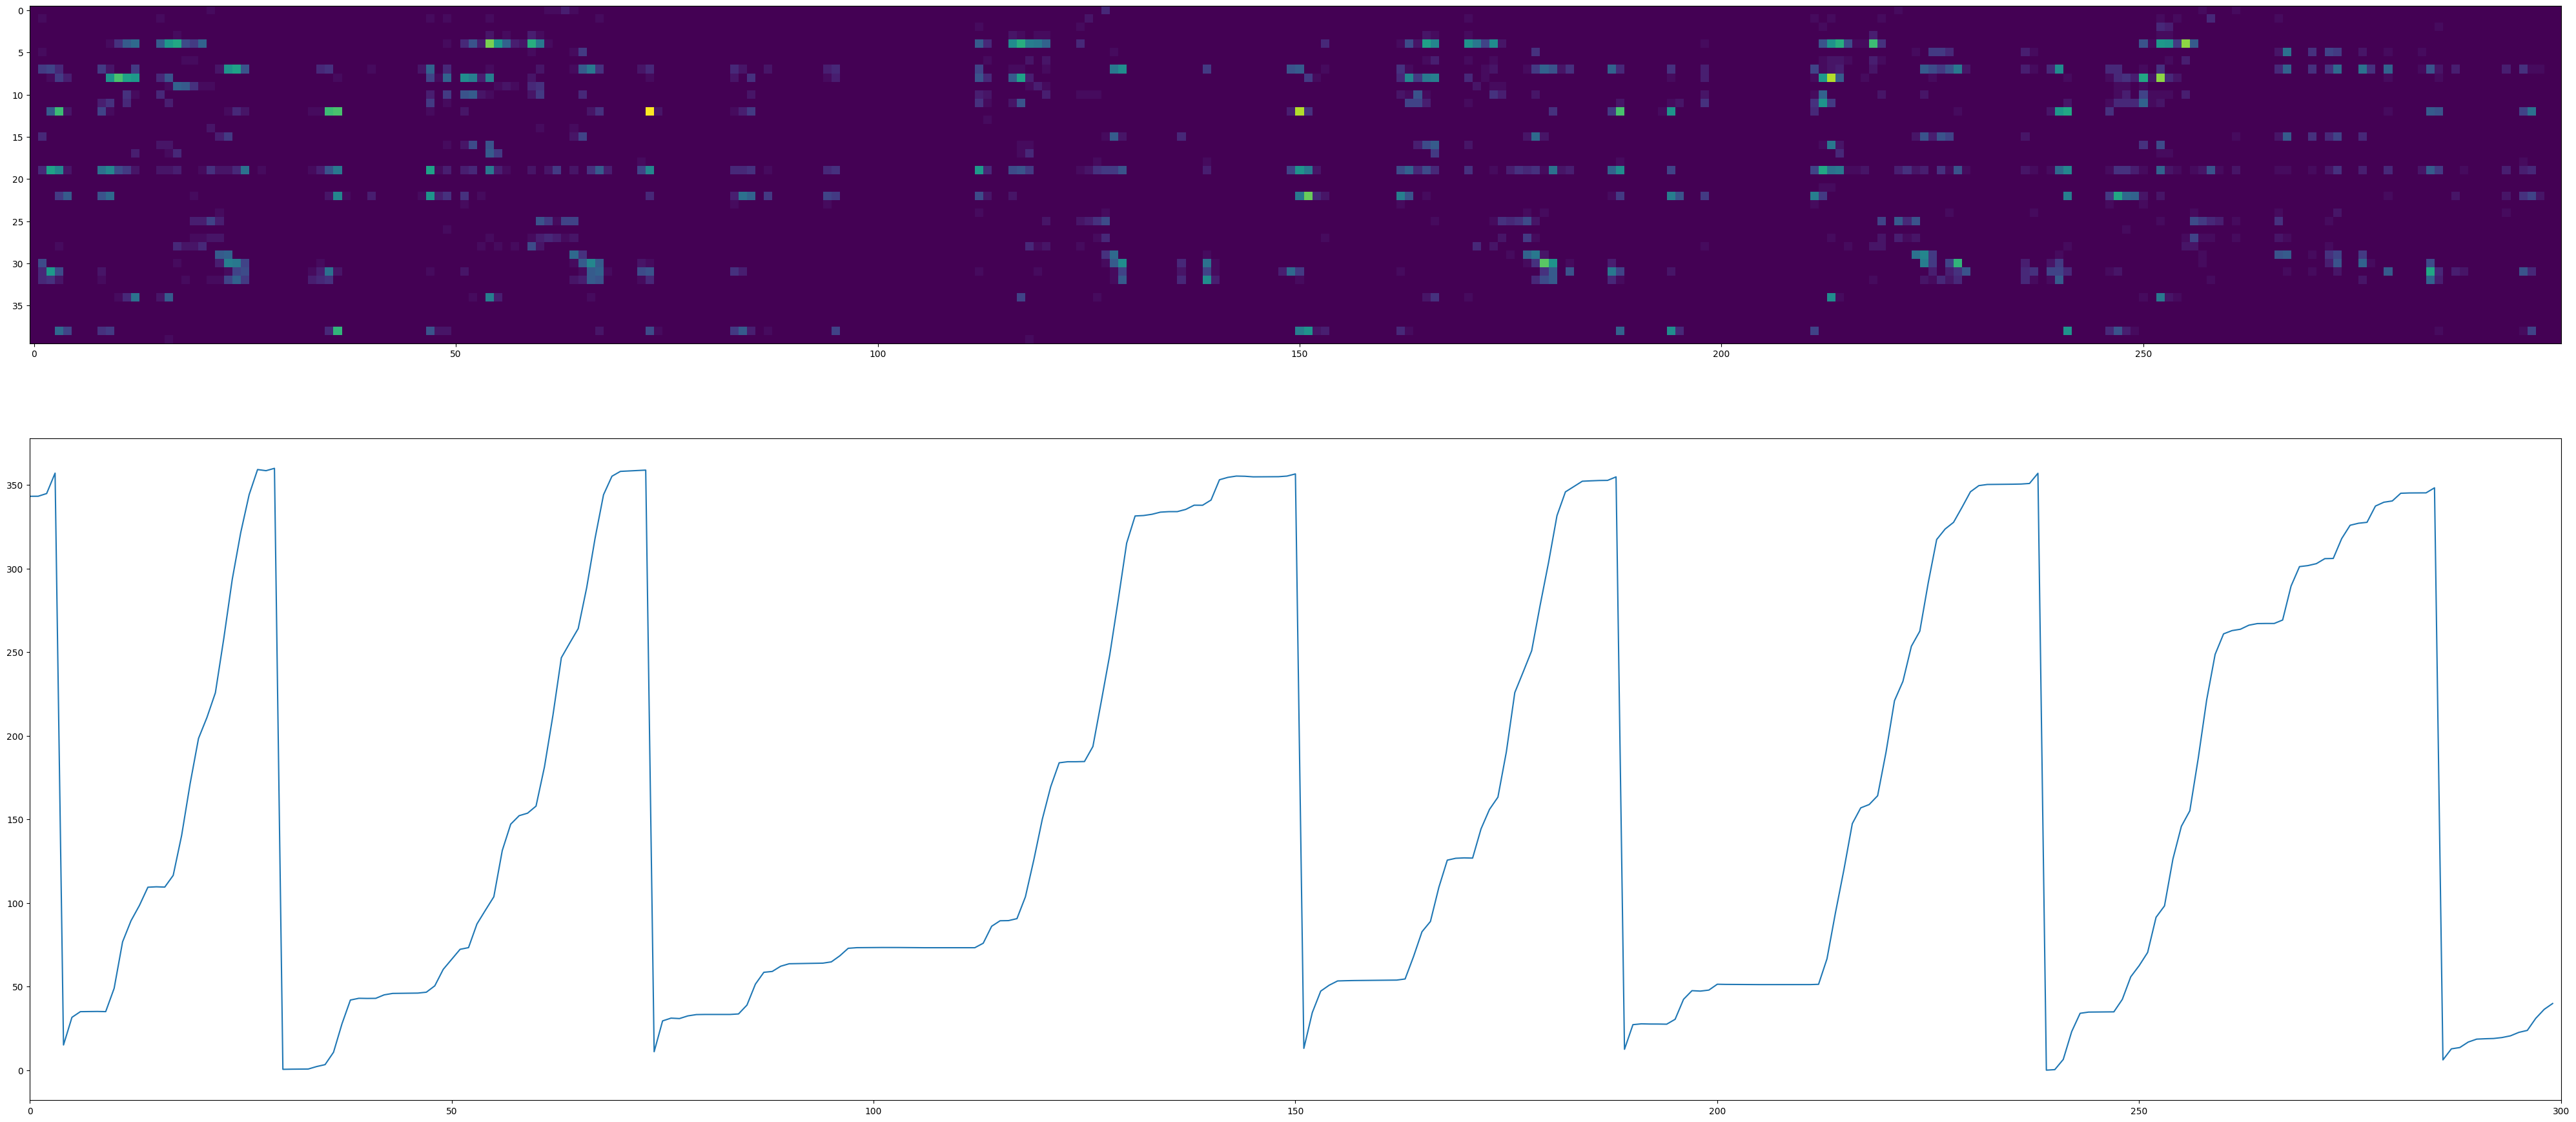

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(40, 20))

axes[0].imshow(
    place_cells[
        100:400,
    ].T,
    cmap="viridis",
)
axes[1].plot(mod360_encangles[100:400])
axes[1].set_xlim(xmin=0, xmax=300)
plt.tight_layout()

# Explore all raw data

In [40]:
string_base = os.path.join(RAW_DIR, "expt*.mat")
print(string_base)
paths = sorted(glob.glob(string_base))

/home/nmiolane/code/neuralgeom/neuralgeom/data/raw/expt*.mat


In [41]:
expt_to_ncells_dict = {}
for path in paths:
    expt = utils.loadmat(path)
    basename = os.path.basename(path).split(".")[0]
    try:
        ncells = len(expt["x"]["clust"])
    except KeyError:
        print(f"!! Skipping {basename}")
        continue
    print(f"{basename}: {ncells} neurons.")
    expt_to_ncells_dict[basename] = ncells

expt10: 15 neurons.
expt10_hd: 30 neurons.
expt11: 11 neurons.
expt11_hd: 25 neurons.
expt12: 11 neurons.
expt12_hd: 27 neurons.
expt13: 11 neurons.
expt13_hd: 27 neurons.
expt14: 13 neurons.
expt14_hd: 38 neurons.
expt15: 11 neurons.
expt15_hd: 32 neurons.
expt16: 11 neurons.
expt16_hd: 26 neurons.
expt17: 11 neurons.
expt17_hd: 38 neurons.
expt18_hd: 36 neurons.
expt19_hd: 30 neurons.
expt2: 11 neurons.
expt20_hd: 29 neurons.
expt21_hd: 34 neurons.
expt23_hd: 19 neurons.
expt26_hd: 21 neurons.
expt27_hd: 18 neurons.
expt28_hd: 21 neurons.
expt29_hd: 21 neurons.
expt30_hd: 21 neurons.
expt31_hd: 24 neurons.
expt32_hd: 25 neurons.
expt33_hd: 16 neurons.
expt34: 40 neurons.
expt34_hd: 19 neurons.
expt35_hd: 17 neurons.
expt36_hd: 19 neurons.
expt37_hd: 20 neurons.
expt38_hd: 46 neurons.
expt39: 13 neurons.
expt39_hd: 48 neurons.
expt3_hd: 16 neurons.
expt4: 15 neurons.
expt40_hd: 50 neurons.
expt41: 12 neurons.
expt41_hd: 45 neurons.
expt42_hd: 44 neurons.
expt43: 12 neurons.
expt43_hd:

In [42]:
expt_to_ncells = pd.DataFrame.from_dict(
    expt_to_ncells_dict, orient="index", columns=["ncells"]
)
path = os.path.join(os.getcwd(), "data/expt_to_ncells.csv")
print(f"Saving the number of cells per experiments to: {path}.")
expt_to_ncells.to_csv(path)

Saving the number of cells per experiments to: /home/nmiolane/code/neuralgeom/neuralgeom/data/expt_to_ncells.csv.


In [43]:
sorted_expt_to_ncells = expt_to_ncells.sort_values(by="ncells", ascending=False)

In [44]:
sorted_expt_to_ncells[:10]

,ncells
expt45_hd,67
expt49_hd,58
expt44_hd,58
expt53_hd,57
expt47_hd,56
expt43_hd,55
expt48_hd,52
expt52_hd,51
expt40_hd,50
expt46_hd,50
